In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("C:/Users/jaitr/Downloads/Titanic-Dataset.csv")
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [4]:
X = df[['Age']]
y = df['Fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

MAE: 25.446134954887363
MSE: 1524.6365182168759
R² Score: 0.014729652921299241
Coefficient (slope): 0.36205243579534546
Intercept: 22.012850006571924


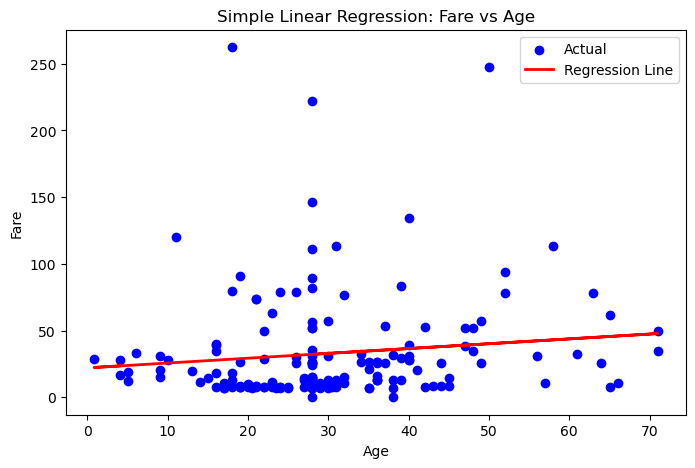

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.title("Simple Linear Regression: Fare vs Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.show()